In [41]:
import cv2
from  matplotlib import pyplot as plt


In [30]:
import torch
import cv2
import torchvision.models as models
from PIL import Image
import torch.nn as nn
import numpy as np
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2] 按比例把宽W缩小到256
 transforms.CenterCrop(224),                #[3] 中间裁剪出224x224大小的图片
 transforms.ToTensor(),                     #[4] 将numpy数组或PIL.Image读的图片转换成(C,H, W)的Tensor格式且/255归一化到[0,1.0]之间
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

class FeatureExtractor(nn.Module):
    def __init__(self, submodule, extracted_layers):
        super(FeatureExtractor, self).__init__()
        self.submodule = submodule
        self.extracted_layers = extracted_layers
 
    # 自己修改forward函数
    def forward(self, x):
        outputs = []
        print('forward')
        for name, module in self.submodule._modules.items():
            #print(x.shape)
            #print(name)
            #print(module)
            if name == "fc":
                x = x.view(x.size(0), -1)
            x = module(x)
            if name in self.extracted_layers:
                outputs.append(x)
        return outputs

extract_list = ["conv1", "layer1", "avgpool", "fc"]

In [12]:
#加载参数
weights = torch.load('pretrained_model\\resnet101-5d3b4d8f.pth')
#print(weights) 
#用参数加载模型
net = models.resnet101(pretrained=False)
net.load_state_dict(weights)

<All keys matched successfully>

In [37]:
img = Image.open('dog.jpg')
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)
print(batch_t.shape)
#预测
net.eval()
out = net(batch_t)
print(out.shape)
_, index = torch.max(out, 1)

#标签
with open('labels.txt') as f:
    classes = [line.strip() for line in f.readlines()]
#
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(classes[index[0]], percentage[index[0]].item())
#
extract_result = FeatureExtractor(net, extract_list)

result = extract_result(batch_t)
feature = result[1].data.numpy()
print(feature.shape)
print(np.squeeze(feature).shape)
print(result[0].data.numpy().shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 1000])
207: 'golden retriever', 90.20382690429688
forward
(1, 256, 56, 56)
(256, 56, 56)
(1, 64, 112, 112)


In [38]:
feat = result[0].data.numpy()

In [39]:
feat = np.squeeze(feat)

In [40]:
feat.shape

(64, 112, 112)

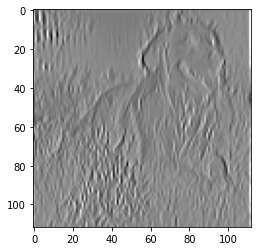

In [46]:
plt.imshow(feat[2,:,:], cmap='gray')


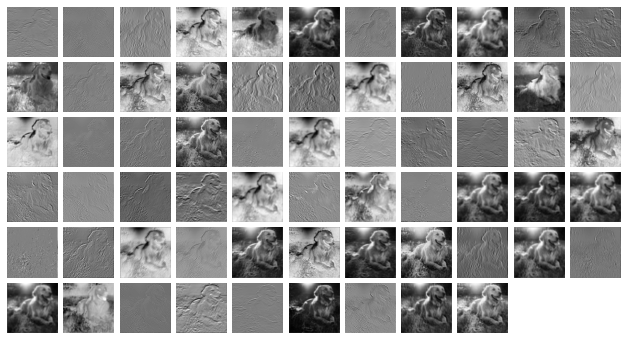

In [42]:
plt.figure(figsize=(11,6))
for ii in range(64):
    plt.subplot(6, 11, ii+1)
    plt.imshow(feat[ii,:,:], cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [18]:
img = cv2.imread('dog.jpg')

In [19]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
img.shape

(634, 638)